# This is to show some of the issues trying to use machine learning for stock price prediction

Conclusion: It is NOT as easy as you may think.

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv
/kaggle/input/nyse/fundamentals.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
import pkg_resources 

pkg_resources.get_distribution('pandas').version

'0.25.3'

# Import and look at data

In [3]:
prices = pd.read_csv('../input/nyse/prices.csv')
PSA = pd.read_csv('../input/nyse/prices-split-adjusted.csv')  # prices-split-adjusted
securities = pd.read_csv('../input/nyse/securities.csv')
fundamentals = pd.read_csv('../input/nyse/fundamentals.csv')

In [4]:
display([prices.shape, PSA.shape, securities.shape, fundamentals.shape])
display(prices.head(), PSA.head(), securities.head(), fundamentals.head())

[(851264, 7), (851264, 7), (505, 8), (1781, 79)]

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [5]:
display(PSA.groupby('symbol').size().sort_values(ascending=True),
        fundamentals.groupby('Ticker Symbol').size().sort_values(ascending=True))

symbol
FTV      126
WLTW     251
CSRA     284
HPE      304
KHC      378
        ... 
ETFC    1762
ESS     1762
ESRX    1762
FTI     1762
JEC     1762
Length: 501, dtype: int64

Ticker Symbol
CSRA    2
MYL     2
AVGO    2
QRVO    3
NAVI    3
       ..
ESS     4
ES      4
EQT     4
F       4
ZTS     4
Length: 448, dtype: int64

* PSA and prices have the same content. Use PSA hereafter
* Not all symbols have the same time lenght of data, but most have data from 2010 to 2016. 
* The fundamentals has at most 4 data points for any company and do not seem useful. Ignore.
* data in securities are not useful for us. 

Use data of APPLE for further analysis

# Feature engineering

In [6]:
apple = (PSA.loc[PSA['symbol']=='AAPL']
         .drop(columns='symbol')
         .sort_values(by='date',ascending=True)
         .reset_index(drop=True)
         .assign(**{'average': lambda df: df.loc[:,['open','high','low','close']].mean(axis=1), 
                    'EMA20': lambda df: df['average'].ewm(span=20, adjust=False).mean(), 
                    'EMA5': lambda df: df['average'].ewm(span=5, adjust=False).mean(), 
                    'dist_EMA20': lambda df: (df['average'] - df['EMA20'])/df['EMA20']*100, 
                    'dist_EMA5': lambda df: (df['average'] - df['EMA5'])/df['EMA5']*100}))
apple.head()

,date,open,close,low,high,volume,average,EMA20,EMA5,dist_EMA20,dist_EMA5
0,2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0,30.511428,30.511428,30.511428,0.000000,0.000000
1,2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0,30.636428,30.523333,30.553095,0.370519,0.272748
2,2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0,30.404643,30.512029,30.503611,-0.351948,-0.324447
3,2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0,30.120715,30.474761,30.375979,-1.161769,-0.840348
4,2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0,30.119286,30.440906,30.290415,-1.056540,-0.564959


In [7]:
# use volume weighted averaged OHLC.mean to represent market average
# comparison with SPY500 shows that market_average calculated this way is representative of overall market

tickers_with_all_dates = PSA.groupby('symbol').size().loc[lambda s: s.values==s.values.max()].index.to_list()
market = (PSA.loc[PSA['symbol'].isin(tickers_with_all_dates)]
          .assign(**{'average': lambda df: df.loc[:,['open','high','low','close']].mean(axis=1), 
                     'price x volume': lambda df: df['average']*df['volume']})
          .groupby('date')
          .agg(**{'price x volume sum': pd.NamedAgg(column='price x volume', aggfunc=np.sum), 
                  'volume sum': pd.NamedAgg(column='volume', aggfunc=np.sum)})
          .assign(**{'market_average': lambda df: df['price x volume sum']/df['volume sum']})
          .sort_index(ascending=True))

apple['market'] = market['market_average'].values
apple.head()

,date,open,close,low,high,volume,average,EMA20,EMA5,dist_EMA20,dist_EMA5,market
0,2010-01-04,30.490000,30.572857,30.340000,30.642857,123432400.0,30.511428,30.511428,30.511428,0.000000,0.000000,29.678244
1,2010-01-05,30.657143,30.625713,30.464285,30.798571,150476200.0,30.636428,30.523333,30.553095,0.370519,0.272748,29.059594
2,2010-01-06,30.625713,30.138571,30.107143,30.747143,138040000.0,30.404643,30.512029,30.503611,-0.351948,-0.324447,30.167701
3,2010-01-07,30.250000,30.082857,29.864286,30.285715,119282800.0,30.120715,30.474761,30.375979,-1.161769,-0.840348,29.071708
4,2010-01-08,30.042856,30.282858,29.865715,30.285715,111902700.0,30.119286,30.440906,30.290415,-1.056540,-0.564959,30.129269


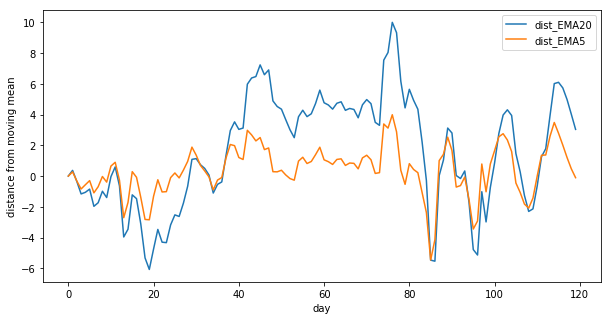

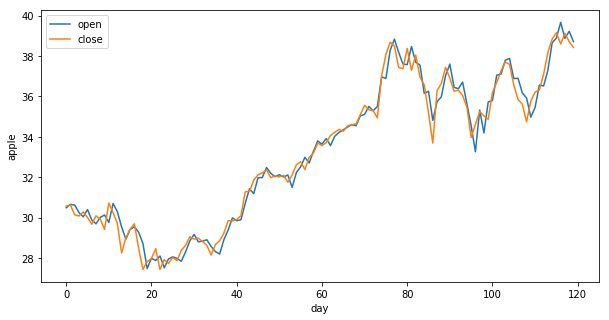

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(apple.index[:120], apple['dist_EMA20'][:120], label='dist_EMA20')
ax.plot(apple.index[:120], apple['dist_EMA5'][:120], label='dist_EMA5')
ax.set_xlabel('day')
ax.set_ylabel('distance from moving mean')
ax.legend(loc='best')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(apple.index[:120], apple['open'][:120], label='open')
ax.plot(apple.index[:120], apple['close'][:120], label='close')
ax.set_xlabel('day')
ax.set_ylabel('apple')
ax.legend(loc='best')

# Create sample of sequences and normalize within each sample
- will this make each sample independent from each other? -- No, you will see why later.

In [9]:
# use previous 120 days' data to predict price in 5 days
lookback = 120  
lookahead = 5

# Create sequence samples
# note: normalization is done with information within a sequence
features = ['open', 'close', 'low', 'high', 'volume', 'dist_EMA20', 'dist_EMA5', 'market']
data = apple[features].values
X = np.array([data[i:i+lookback].copy() for i in range(len(data) - lookback - lookahead)])
X[:,:,0:4] = X[:,:,0:4]/X[:,0,0, None, None]
X[:,:,4] = X[:,:,4]/X[:,0,None,4]
X[:,:,-1] = X[:,:,-1]/X[:,0,None,-1]
y = np.array([(data[i+lookback+lookahead-1,1] - data[i+lookback-1,1])/data[i+lookback-1,1]*100 for i in range(len(data) - lookback - lookahead)])

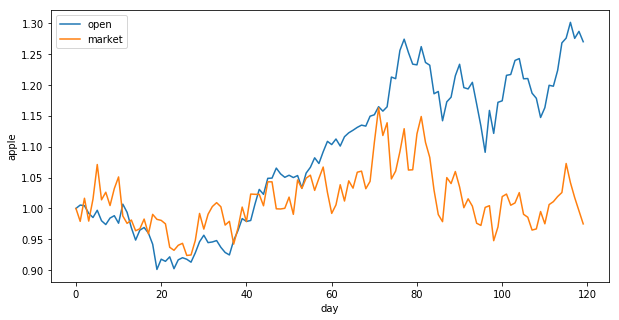

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(X[0].shape[0]), X[0,:,0], label='open')
ax.plot(range(X[0].shape[0]), X[0,:,-1], label='market')
ax.set_xlabel('day')
ax.set_ylabel('apple')
ax.legend(loc='best')

# RNN model

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_input (InputLayer)      (None, 120, 8)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                18688     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________


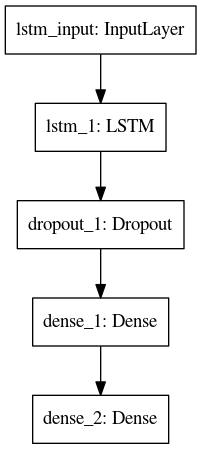

In [11]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers

np.random.seed(4)

lstm_input = Input(shape=(lookback, len(features)), name='lstm_input')
x = LSTM(units=64, return_sequences=False, return_state=False)(lstm_input)  
x = Dropout(0.2)(x)
x = Dense(units=32, activation='relu')(x)
output = Dense(1, activation='linear')(x)
model = Model(inputs=lstm_input, outputs=output)

adam = optimizers.Adam(lr=0.0005)

model.compile(optimizer=adam, loss='mse')

weights = model.get_weights()  # needed to reset the model 

model.summary()
from keras.utils import plot_model
plot_model(model) 

# Train model

In [12]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print("{} train samples, {} test samples".format(X_train.shape[0], X_test.shape[0]))

model.fit(X_train, y_train, epochs=80, verbose=0)

1309 train samples, 328 test samples


# test model

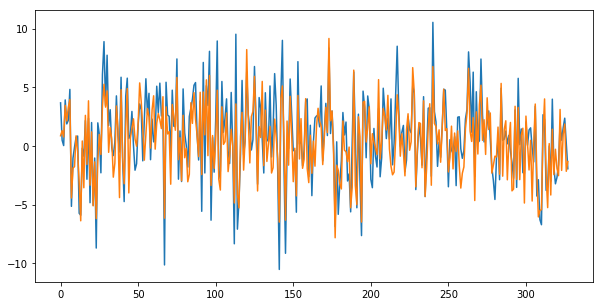

In [13]:
y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(len(y_test)), y_test, label='y_test')
ax.plot(range(len(y_test)), y_pred, label='y_pred')

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6630077720385336

In [15]:
num_right = (np.sign(y_test) == np.sign(y_pred).squeeze()).sum()
num_right/len(y_test)

0.823170731707317

The accuracy is too high. You have to question if the sample are truly independent.
The fact is that they are not because we create the samples by moving forward one step at a time. 
So for each sample, the samples before and after it will be very similar to it. 
When we split train and test samples randomly, for each test sample, there may be several train sample similar to it, which gives the fake high accuracy. 
<font color=red>Do NOT split samples randomly for time-series problem</font>

# Split train and test without randomness and retrain model

In [16]:
test_size = 0.2
k = np.round(len(X)*(1-test_size)).astype(int)
X_train, X_test, y_train, y_test = X[:k,:,:], X[k:,:,:], y[:k], y[k:]
print("{} train samples, {} test samples".format(X_train.shape[0], X_test.shape[0]))

1310 train samples, 327 test samples


In [17]:
model.set_weights(weights)

train_history = model.fit(X_train, y_train, epochs=50, verbose=0)

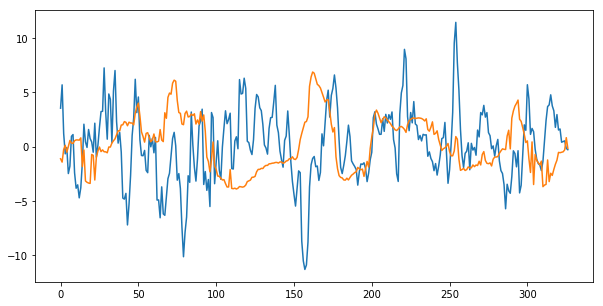

In [18]:
y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(range(len(y_test)), y_test, label='y_test')
ax.plot(range(len(y_test)), y_pred, label='y_pred')

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.7421481735803284

In [20]:
num_right = (np.sign(y_test) == np.sign(y_pred).squeeze()).sum()
num_right/len(y_test)

0.43730886850152906

After removing randomness in spliting train and test samples, the model accuracy becomes <font color=red>drastically worse</font>. Close to random guess!

# Predict into unknown future (use predicted output as input) 

For this to work, the output must have same shape as the input and lookahead must be 1 -- so the output can be used as input. Need to modify model.

## Still train model with 1 day lookahead

In [21]:
lookback = 120
lookahead = 1

# Create sequence samples
features = ['open', 'close', 'low', 'high', 'volume', 'dist_EMA20', 'dist_EMA5', 'market']
data = apple[features].values
X = np.array([data[i:i+lookback].copy() for i in range(len(data) - lookback - lookahead)])
y = np.array([data[i+lookback+lookahead-1] for i in range(len(data) - lookback - lookahead)])

# must normalize y first
y[:,0:4] = y[:,0:4]/X[:,0,0, None]
y[:,4] = y[:,4]/X[:,0,4]
y[:,-1] = y[:,-1]/X[:,0,-1]

X[:,:,0:4] = X[:,:,0:4]/X[:,0,0, None, None]
X[:,:,4] = X[:,:,4]/X[:,0,None,4]
X[:,:,-1] = X[:,:,-1]/X[:,0,None,-1]

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_input (InputLayer)      (None, 120, 8)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                18688     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
Total params: 21,032
Trainable params: 21,032
Non-trainable params: 0
_________________________________________________________________


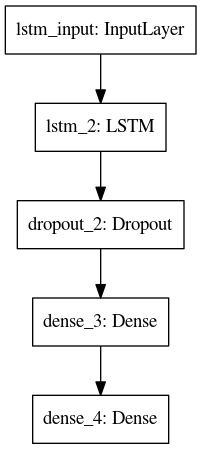

In [22]:
lstm_input = Input(shape=(lookback, len(features)), name='lstm_input')
x = LSTM(units=64, return_sequences=False, return_state=False)(lstm_input)  
x = Dropout(0.2)(x)
x = Dense(units=32, activation='relu')(x)
output = Dense(8, activation='linear')(x)
model_1 = Model(inputs=lstm_input, outputs=output)

adam = optimizers.Adam(lr=0.0005)

model_1.compile(optimizer=adam, loss='mse')

model_1.summary()
from keras.utils import plot_model
plot_model(model_1) #, to_file='model.png')

In [23]:
test_size = 0.2
k = np.round(len(X)*(1-test_size)).astype(int)
X_train, X_test, y_train, y_test = X[:k,:,:], X[k:,:,:], y[:k], y[k:]
print("{} train samples, {} test samples".format(X_train.shape[0], X_test.shape[0]))

1313 train samples, 328 test samples


In [24]:
train_history = model_1.fit(X_train, y_train, epochs=40, verbose=0, validation_data=(X_test, y_test))

## apply model to predict 328 days' price movement in a row

In [25]:
# function to put the new output at the end of input
def insert_end(Xin,new_input):
    for i in range(lookback-1):
        Xin[:,i,:] = Xin[:,i+1,:]
    Xin[:,lookback-1,:] = new_input
    return Xin

In [26]:
first =0   
future=X_test.shape[0]
forcast = []
Xin = X_test[first:first+1,:,:]
for i in range(future):
    out = model_1.predict(Xin, batch_size=1)    
    forcast.append(out) 
    Xin = insert_end(Xin,out) 

forcast_output = np.array(forcast).squeeze()

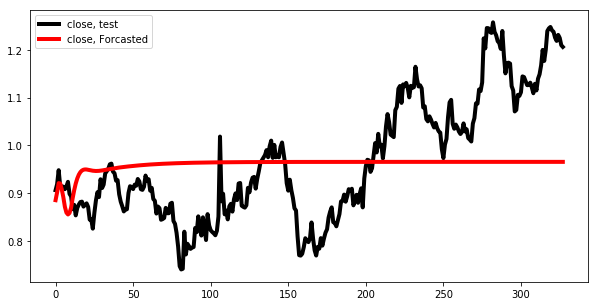

In [27]:
plt.figure(figsize=(10,5))
plt.plot(y_test[:,1] , 'black', linewidth=4)
plt.plot(forcast_output[:,1],'r' , linewidth=4)
plt.legend(('close, test','close, Forcasted'))
plt.show()

Apparently, predicting many days of price movement does NOT work well. 

## apply model to predict 1 day at a time

In [28]:
y_pred = model_1.predict(X_test)

for i in range(y_test.shape[1]):
    print(r2_score(y_test[:, i], y_pred[:, i]))

0.7896241734622345
0.7461908540146711
0.8422046776890114
0.8531349024062379
0.5126740946442045
0.8634287386757348
0.563422650997281
0.1727089408991107


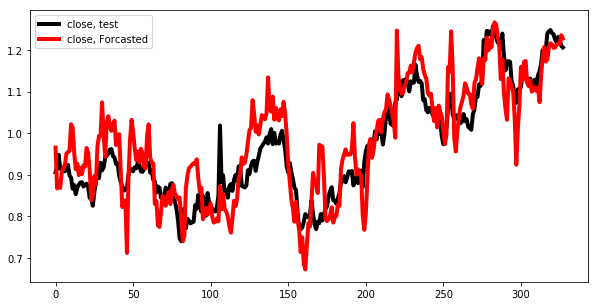

In [29]:
plt.figure(figsize=(10,5))
plt.plot(y_test[:,1] , 'black', linewidth=4)
plt.plot(y_pred[:,1],'r' , linewidth=4)
plt.legend(('close, test','close, Forcasted'))
plt.show()

The R2 scores are not too bade, and two curves seem to follow the same overall trend. But don't let them fool you. 

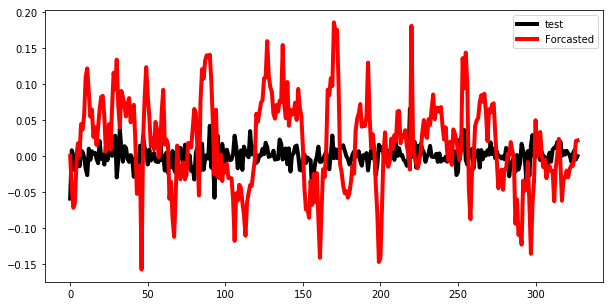

In [30]:
# calculate the changes relative the prior day
y_test_change = y_test - X_test[:, -1, :]
y_pred_change = y_pred - X_test[:, -1, :]

plt.figure(figsize=(10,5))
plt.plot(y_test_change[:,1] , 'black', linewidth=4)
plt.plot(y_pred_change[:,1],'r' , linewidth=4)
plt.legend(('test','Forcasted'))
plt.show()

In [31]:
y_test_close_up = y_test_change[:,1] > 0
y_pred_close_up = y_pred_change[:,1] > 0
print("number of close up days, actural = {}, number of close up days, predicted = {}".format(y_test_close_up.sum(), y_pred_close_up.sum()))
accuracy = (y_pred_close_up == y_test_close_up).sum() / len(y_pred_close_up)
print("percentage of actual and predict have same direction = {:2.2%}".format(accuracy))

number of close up days, actural = 166, number of close up days, predicted = 196
percentage of actual and predict have same direction = 50.61%


The accuray is close to 50% --> No better than random guess! 